In [15]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/vanshika/nltk_data...


True

In [17]:
# Install necessary libraries if not already installed
!pip install textblob nltk vaderSentiment

from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Function to read reviews from a text file
def read_reviews_from_file(filename):
    with open(filename, 'r') as file:
        reviews = file.readlines()
    return [review.strip() for review in reviews]

# Sentiment Analysis using TextBlob
def analyze_sentiment_textblob(reviews):
    results = []
    for review in reviews:
        analysis = TextBlob(review)
        sentiment = "positive" if analysis.sentiment.polarity > 0 else "negative" if analysis.sentiment.polarity < 0 else "neutral"
        results.append((review, sentiment, analysis.sentiment.polarity))
    return results

# Sentiment Analysis using VADER
def analyze_sentiment_vader(reviews):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    for review in reviews:
        sentiment_score = analyzer.polarity_scores(review)
        sentiment = "positive" if sentiment_score['compound'] > 0 else "negative" if sentiment_score['compound'] < 0 else "neutral"
        results.append((review, sentiment, sentiment_score['compound']))
    return results

# Read reviews from the file
reviews = read_reviews_from_file('data/reviews.txt')

# Analyze sentiment with both methods
textblob_results = analyze_sentiment_textblob(reviews)
vader_results = analyze_sentiment_vader(reviews)

# Display the results
print("TextBlob Sentiment Analysis Results:")
for result in textblob_results:
    print(f"Review: {result[0]}\nSentiment: {result[1]} (Polarity: {result[2]})\n")

print("\nVADER Sentiment Analysis Results:")
for result in vader_results:
    print(f"Review: {result[0]}\nSentiment: {result[1]} (Compound Score: {result[2]})\n")


TextBlob Sentiment Analysis Results:
Review: 1. "Absolutely breathtaking views and fantastic skiing conditions! Can't wait to come back next winter."
Sentiment: positive (Polarity: 0.375)

Review: 2. "The lodge was cozy, and the staff was incredibly friendly. Highly recommend the hot cocoa by the fire!"
Sentiment: positive (Polarity: 0.161875)

Review: 3. "Mountain biking trails were well-maintained, and the rental equipment was top-notch."
Sentiment: positive (Polarity: 1.0)

Review: 4. "Loved the guided nature walk. Learned so much about the local wildlife!"
Sentiment: positive (Polarity: 0.3)

Review: 5. "The zip-lining course was thrilling, and the instructors were very professional."
Sentiment: positive (Polarity: 0.19)

Review: 6. "Great family-friendly experience, from sledding to the indoor climbing walls."
Sentiment: positive (Polarity: 0.8)

Review: 7. "The après-ski experience was perfect. Live music, good food, and amazing views!"
Sentiment: positive (Polarity: 0.6465909090

In [21]:
# Install necessary libraries
!pip install transformers torch

from transformers import pipeline

# Load the pre-trained sentiment-analysis pipeline from Hugging Face
sentiment_analyzer = pipeline("sentiment-analysis")

# Function to read reviews from a text file
def read_reviews_from_file(filename):
    with open(filename, 'r') as file:
        reviews = file.readlines()
    return [review.strip() for review in reviews]

# Read reviews from the file
reviews = read_reviews_from_file('data/reviews.txt')

# Analyze sentiment using the transformer model
for review in reviews:
    sentiment = sentiment_analyzer(review)
    print(f"Review: {review}")
    print(f"Sentiment: {sentiment[0]['label']} (Confidence: {sentiment[0]['score']:.2f})\n")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 16.5 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 11.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.6 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 12.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 10.4 MB/s eta 0:00:00


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use mps:0


Review: 1. "Absolutely breathtaking views and fantastic skiing conditions! Can't wait to come back next winter."
Sentiment: POSITIVE (Confidence: 1.00)

Review: 2. "The lodge was cozy, and the staff was incredibly friendly. Highly recommend the hot cocoa by the fire!"
Sentiment: POSITIVE (Confidence: 1.00)

Review: 3. "Mountain biking trails were well-maintained, and the rental equipment was top-notch."
Sentiment: POSITIVE (Confidence: 1.00)

Review: 4. "Loved the guided nature walk. Learned so much about the local wildlife!"
Sentiment: POSITIVE (Confidence: 1.00)

Review: 5. "The zip-lining course was thrilling, and the instructors were very professional."
Sentiment: POSITIVE (Confidence: 1.00)

Review: 6. "Great family-friendly experience, from sledding to the indoor climbing walls."
Sentiment: POSITIVE (Confidence: 1.00)

Review: 7. "The après-ski experience was perfect. Live music, good food, and amazing views!"
Sentiment: POSITIVE (Confidence: 1.00)

Review: 8. "Fantastic ski-in/s

/var/folders/pd/bf6245hd6wn16vxlsjt3fr4w0000gn/T/ipykernel_1658/3556815691.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(textblob_counts.keys()), y=list(textblob_counts.values()), palette="Blues")


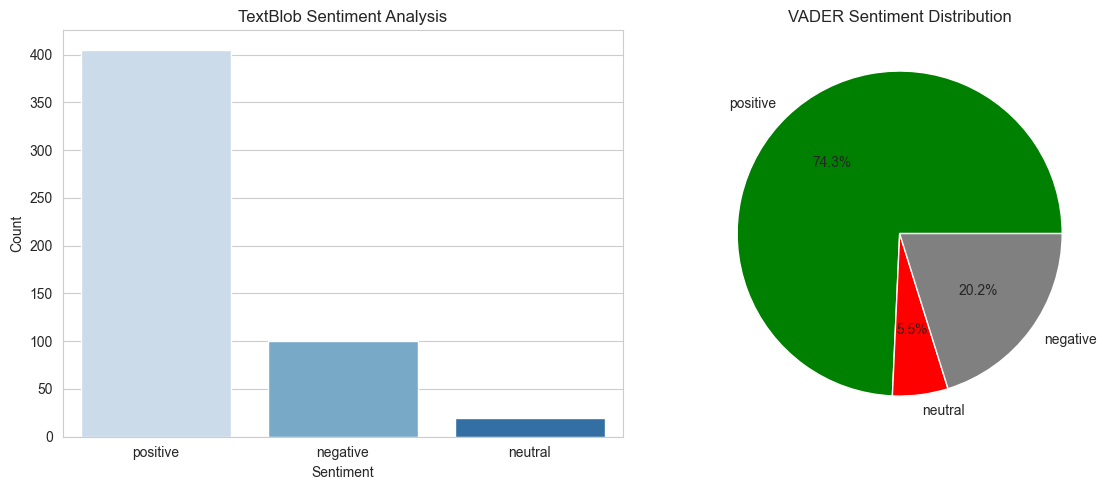

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Extract sentiment labels from results
textblob_sentiments = [result[1] for result in textblob_results]
vader_sentiments = [result[1] for result in vader_results]

# Count occurrences of each sentiment
textblob_counts = Counter(textblob_sentiments)
vader_counts = Counter(vader_sentiments)

# Set plot style
sns.set_style("whitegrid")

# Create a bar chart for TextBlob results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=list(textblob_counts.keys()), y=list(textblob_counts.values()), palette="Blues")
plt.title("TextBlob Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Count")

# Create a pie chart for VADER results
plt.subplot(1, 2, 2)
plt.pie(vader_counts.values(), labels=vader_counts.keys(), autopct='%1.1f%%', colors=['green', 'red', 'gray'])
plt.title("VADER Sentiment Distribution")

plt.tight_layout()
plt.show()


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0
/var/folders/pd/bf6245hd6wn16vxlsjt3fr4w0000gn/T/ipykernel_2333/1897851120.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sentiments, palette="Set2")


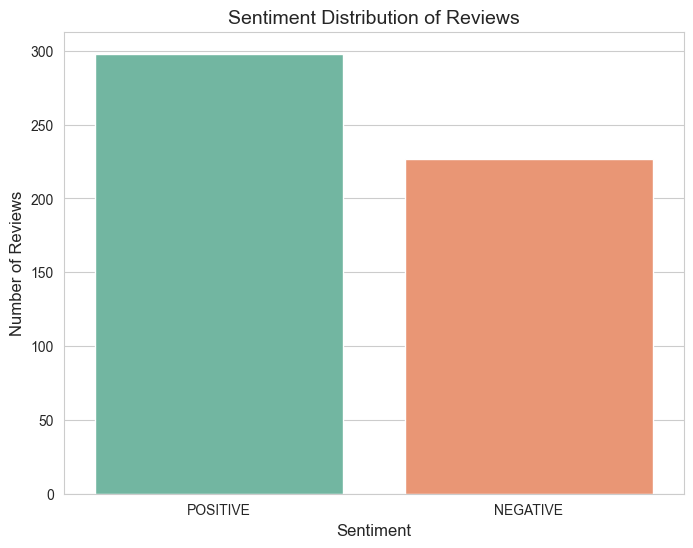

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline

# Load the pre-trained sentiment-analysis pipeline from Hugging Face
sentiment_analyzer = pipeline("sentiment-analysis")

# Function to read reviews from a text file
def read_reviews_from_file(filename):
    with open(filename, 'r') as file:
        reviews = file.readlines()
    return [review.strip() for review in reviews]

# Read reviews from the file
reviews = read_reviews_from_file('data/reviews.txt')

# Analyze sentiment using the transformer model
sentiments = []
for review in reviews:
    sentiment = sentiment_analyzer(review)
    sentiments.append(sentiment[0]['label'])

# Plotting the sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=sentiments, palette="Set2")
plt.title("Sentiment Distribution of Reviews", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.xticks(rotation=0)
plt.show()


[nltk_data] Downloading package punkt to /Users/vanshika/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vanshika/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/pd/bf6245hd6wn16vxlsjt3fr4w0000gn/T/ipykernel_2333/1612457539.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="Blues_d")


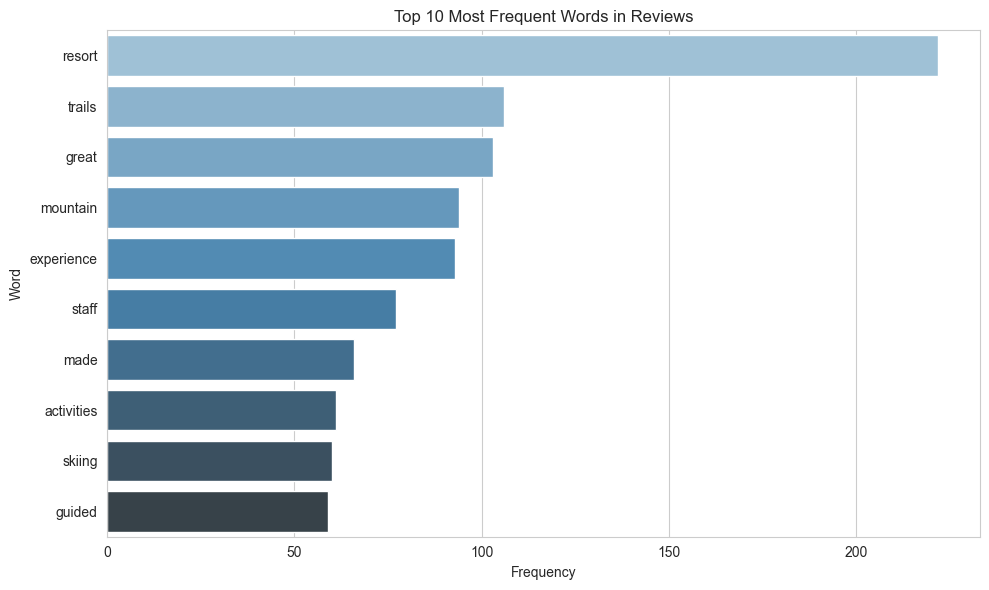

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK resources (only need to run once)
nltk.download('punkt')
nltk.download('stopwords')

# Function to process reviews and get word frequency
def get_most_frequent_words(reviews):
    # Combine all reviews into a single text
    all_reviews = ' '.join(reviews)
    
    # Tokenize the text into words
    words = word_tokenize(all_reviews.lower())
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    
    # Count word frequencies
    word_counts = Counter(filtered_words)
    
    return word_counts

# Get word frequencies from reviews
word_counts = get_most_frequent_words(reviews)

# Get the most common words (top 10)
common_words = word_counts.most_common(10)

# Separate words and counts for plotting
words, counts = zip(*common_words)

# Set plot style
sns.set_style("whitegrid")

# Create a bar chart for the most frequent words
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette="Blues_d")
plt.title("Top 10 Most Frequent Words in Reviews")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()



Device set to use mps:0
/var/folders/pd/bf6245hd6wn16vxlsjt3fr4w0000gn/T/ipykernel_1658/2689052731.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sentiments, palette="Set2")


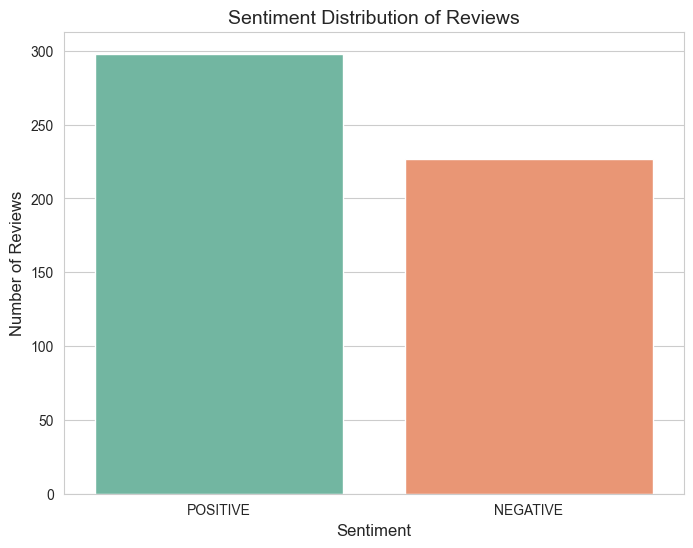

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, pipeline
import torch

# Load pre-trained DistilBERT model and tokenizer for sentiment analysis
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertForSequenceClassification.from_pretrained(model_name)

# Use Hugging Face's pipeline for sentiment analysis
sentiment_analyzer = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Function to read reviews from a text file
def read_reviews_from_file(filename):
    with open(filename, 'r') as file:
        reviews = file.readlines()
    return [review.strip() for review in reviews]

# Read reviews from the file
reviews = read_reviews_from_file('data/reviews.txt')

# Analyze sentiment using DistilBERT
sentiments = []
for review in reviews:
    sentiment = sentiment_analyzer(review)
    sentiments.append(sentiment[0]['label'])

# Plotting the sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=sentiments, palette="Set2")
plt.title("Sentiment Distribution of Reviews", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.xticks(rotation=0)
plt.show()


In [26]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /Users/vanshika/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
import nltk
nltk.data.path = ['/tmp/nltk_data']  # This ensures NLTK uses the local directory for downloading
nltk.download('punkt')


[nltk_data] Downloading package punkt to /Users/vanshika/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
pip install spacy

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 6.9 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.7/636.7 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.1/825.1 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 11.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 13.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK resources
nltk.download('punkt')  # Tokenization
nltk.download('stopwords')  # Stopwords

# Function to read reviews from a text file
def read_reviews_from_file(filename):
    with open(filename, 'r') as file:
        reviews = file.readlines()
    return [review.strip() for review in reviews]

# Read reviews from the file
reviews = read_reviews_from_file('data/reviews.txt')

# Combine all reviews into one text
all_reviews_text = " ".join(reviews)

# Tokenize the text into words
tokens = word_tokenize(all_reviews_text.lower())  # Convert to lowercase for consistency

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_tokens)

# Get the most common words
most_common_words = word_counts.most_common(10)

# Extract words and their frequencies for plotting
words, frequencies = zip(*most_common_words)

# Plotting the most frequent words
plt.figure(figsize=(10, 6))
sns.barplot(x=list(words), y=list(frequencies), palette='Set2')
plt.title("Most Frequent Words in Reviews", fontsize=14)
plt.xlabel("Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)
plt.show()


[nltk_data] Downloading package punkt to /Users/vanshika/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vanshika/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/vanshika/nltk_data'
    - '/opt/miniconda3/nltk_data'
    - '/opt/miniconda3/share/nltk_data'
    - '/opt/miniconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
import spacy

# Load the English tokenizer from spaCy
nlp = spacy.load("en_core_web_sm")

# Tokenize the text into words
doc = nlp(all_reviews_text.lower())
tokens = [token.text for token in doc if token.is_alpha]  # Filter out punctuation



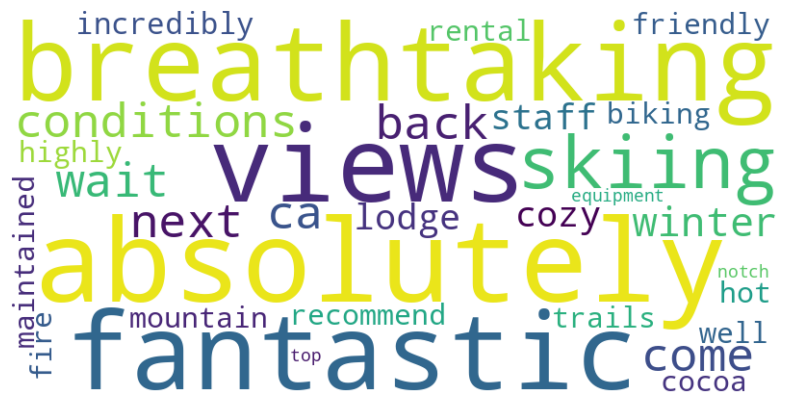

In [6]:
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the English tokenizer from spaCy
nlp = spacy.load("en_core_web_sm")

# Example reviews text (replace this with the text you are using)
all_reviews_text = """Absolutely breathtaking views and fantastic skiing conditions! Can't wait to come back next winter.
The lodge was cozy, and the staff was incredibly friendly. Highly recommend the hot cocoa by the fire!
Mountain biking trails were well-maintained, and the rental equipment was top-notch."""

# Tokenize the text into words
doc = nlp(all_reviews_text.lower())  # Tokenize and convert to lowercase
tokens = [token.text for token in doc if token.is_alpha]  # Filter out punctuation

# Generate a word cloud from the tokens
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(tokens))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')

# Function to read reviews from the file
def read_reviews_from_file(filename):
    with open(filename, 'r') as file:
        reviews = file.readlines()
    return [review.strip() for review in reviews]

# Read reviews from file
reviews = read_reviews_from_file('data/reviews.txt')

# Combine all reviews into a single string
all_reviews_text = " ".join(reviews)

# Tokenize the text into words and remove stopwords
tokens = word_tokenize(all_reviews_text.lower())  # Convert to lowercase for consistency
stop_words = set(stopwords.words('english'))

# Remove stopwords and non-alphabetical tokens
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Generate word frequencies
word_frequencies = nltk.FreqDist(filtered_tokens)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()


[nltk_data] Downloading package punkt to /Users/vanshika/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vanshika/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/vanshika/nltk_data'
    - '/opt/miniconda3/nltk_data'
    - '/opt/miniconda3/share/nltk_data'
    - '/opt/miniconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [13]:
import os

file_path = "data/reviews.txt"

if os.path.exists(file_path):
    print("File exists!")
else:
    print("File not found. Check the path.")

File exists!


In [8]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/vanshika/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

[nltk_data] Downloading package punkt to /Users/vanshika/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vanshika/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/pd/bf6245hd6wn16vxlsjt3fr4w0000gn/T/ipykernel_2333/1807522063.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="Blues_d")


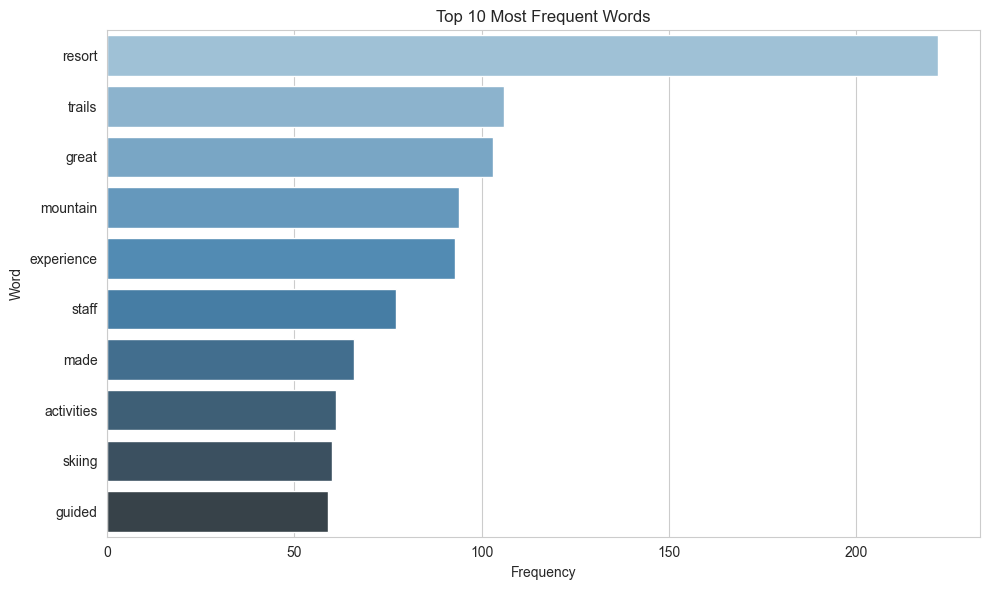

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK resources (only need to run once)
nltk.download('punkt')
nltk.download('stopwords')

# Function to process reviews and get word frequency
def get_most_frequent_words(reviews):
    # Combine all reviews into a single text
    all_reviews = ' '.join(reviews)
    
    # Tokenize the text into words
    words = word_tokenize(all_reviews.lower())
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    
    # Count word frequencies
    word_counts = Counter(filtered_words)
    
    return word_counts

# Get word frequencies from reviews
word_counts = get_most_frequent_words(reviews)

# Get the most common words (top 10)
common_words = word_counts.most_common(10)

# Separate words and counts for plotting
words, counts = zip(*common_words)

# Set plot style
sns.set_style("whitegrid")

# Create a bar chart for the most frequent words
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette="Blues_d")
plt.title("Top 10 Most Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()
